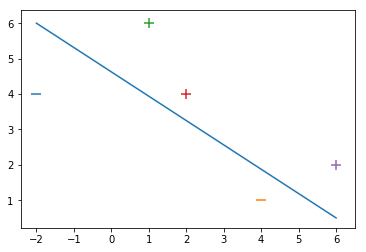

In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Step 1: define data
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1]
])

# Associated output labels - First 2 examples are labeled '-1' and last 3 example labeled '1'
y = np.array([-1, -1, 1, 1, 1])

# Let plot these examples on a 2D graph!
for d, sample in enumerate(X):
    # Plot the negative examples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)
        
# Print a positive hyperplane, that is seperating the two classes.
plt.plot([-2, 6],  [6, 0.5])

In [6]:
# Perforn gradient decent
def svm_sgd_plot(X, Y):
    # Initial SVMs weight vector with zeros (3 values)
    w = np.zeros(len(X[0]))
    
    # Learning rate
    eta = 1
    
    # How many interations to train for
    epochs = 100000
    
    # Store misclassifications so we can plot how they change over time
    errors = []
    
    # Training!!! (gradient decent)
    for epoch in range(1, epochs):
        error = 0
        
        for i, x in enumerate(X):
            # Misclassification
            if (Y[i]*np.dot(X[i], w)) < 1:
                # Misclassified update for our weights
                w = w + eta * ((X[i] * Y[i]) + (-2 * (1/epoch) * w))
                error = 1
            else:
                # Correct classification, update weights
                w = w + eta * (-2 * (1 / epoch) * w)
        errors.append(error)
        
    # Plot the rate of classification errors during training
    plt.plot(errors, '|')
    plt.ylim(0.5, 1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()
    
    return w

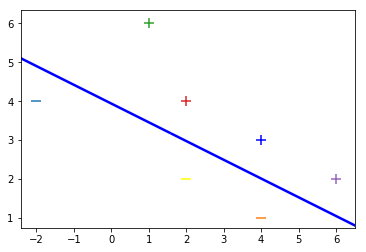

In [8]:
# Let plot these examples on a 2D graph!
for d, sample in enumerate(X):
    # Plot the negative examples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)
        
# Add test sample
plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyerplane calculated by svm_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

d:\program files\python36\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


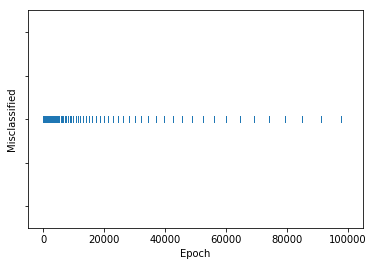

In [7]:
w = svm_sgd_plot(X,y)
#they decrease over time! Our SVM is learning the optimal hyperplane